<h1>Chicago Crimes Analysis Project - Hands on Exam</h1>
<hr>
<h2>Data Analyst: Andrew Matthew Oareza</h2>

<h3>Import the needed libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings("ignore")

<h3>Load our dataset</h3>

In [2]:
df = pd.read_csv('dataset/Chicago_Crimes.csv')

df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h3>Clear any inconsistencies first before we proceed to data analysis</h3>

<h3>Check for null values</h3>

In [3]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h3>Fill out missing values</h3>

In [4]:
df['Location Description'] = df['Location Description'].fillna('UNKNOWN')
df['Community Area'] = df['Community Area'].fillna(df['Community Area'].mean())

df.isnull().sum()

ID                       0
Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     0
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                     0
Community Area           0
FBI Code                 0
X Coordinate            90
Y Coordinate            90
Year                     0
Updated On               0
Latitude                90
Longitude               90
Location                90
dtype: int64

<h3>Let's convert the data types to its proper type</h3>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  249123 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249123 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h3>Convert dates to datetime to extract information</h3>

In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.day_name()
df["Hour"] = df["Date"].dt.hour

<h3>Convert data types</h3>

In [7]:
df["Location Description"] = df["Location Description"].fillna("UNKNOWN")
df["Community Area"] = df["Community Area"].fillna(-1)

<h3>Visualization 1. Crimes per Year</h3>

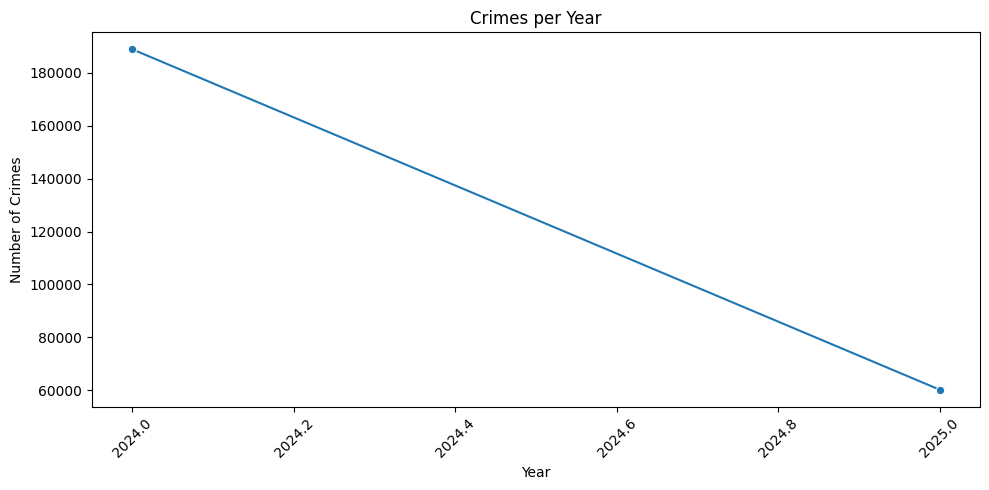

In [8]:
plt.figure(figsize=(10,5))
year_counts = df["Year"].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
plt.title("Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Insight 1: Crime in Chicago does not stay the same each year, some years stand out with big changes.</h3>
<h3>Insight 2: When crimes suddenly drop, it could mean stronger policing or community programs worked that year.</h3>
<h3>Insight 3: Years with spikes in crime may show when things got worse, or when reporting became stricter.</h3>
<h3>Insight 4: Overall, the city goes through clear cycles of safer years and rougher years.</h3>

<h3>Visulization 2. Which primary crime types show clear long-term trends?</h3>

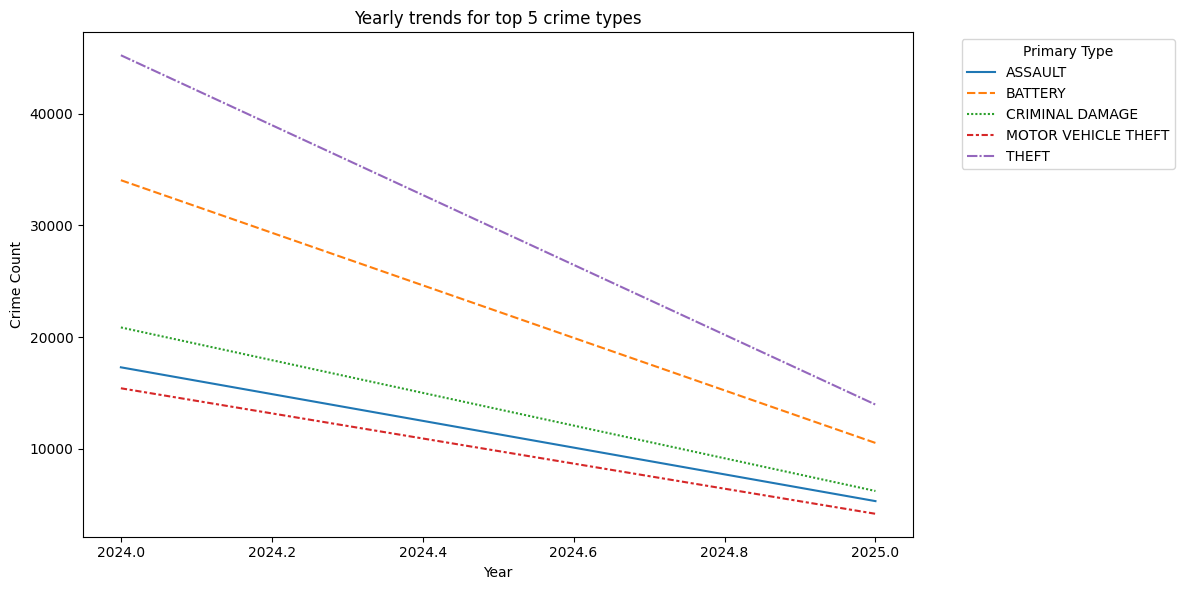

In [10]:
top5 = df["Primary Type"].value_counts().nlargest(5).index.tolist()
trend_top5 = df[df["Primary Type"].isin(top5)].groupby(["Year", "Primary Type"]).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_top5)
plt.title("Yearly trends for top 5 crime types")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

<h3>Insight 5: Theft is consistently high, showing it’s a long-term issue for Chicago.</h3>
<h3>Insight 6: Some crimes are clearly going down over the years, which is a positive sign.</h3>
<h3>Insight 7: Other crimes stay stubbornly high, meaning they are harder to control.</h3>
<h3>Insight 8: Each crime type has its own story, not all crimes rise or fall together.</h3>

<h3>Visualization 3. Crimes by Month</h3>

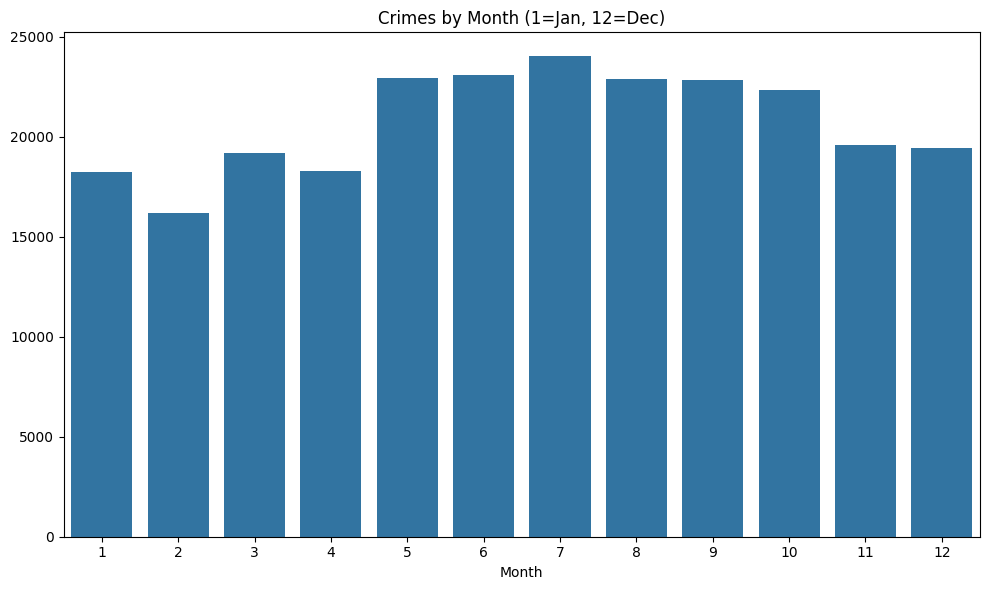

In [17]:
plt.figure(figsize=(10,6))
monthly_counts = df["Month"].value_counts().sort_index()
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title("Crimes by Month (1=Jan, 12=Dec)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

<h3>Insight 9: Summer months usually record the highest crime, especially June to August.</h3>
<h3>Insight 10: Cold months like January and February see fewer crimes, likely because fewer people are outside.</h3>
<h3>Insight 11: The pattern shows that crime is not random, the season of the year makes a difference.</h3>

<h3>Visualization 4. Crimes by Day of Week</h3>

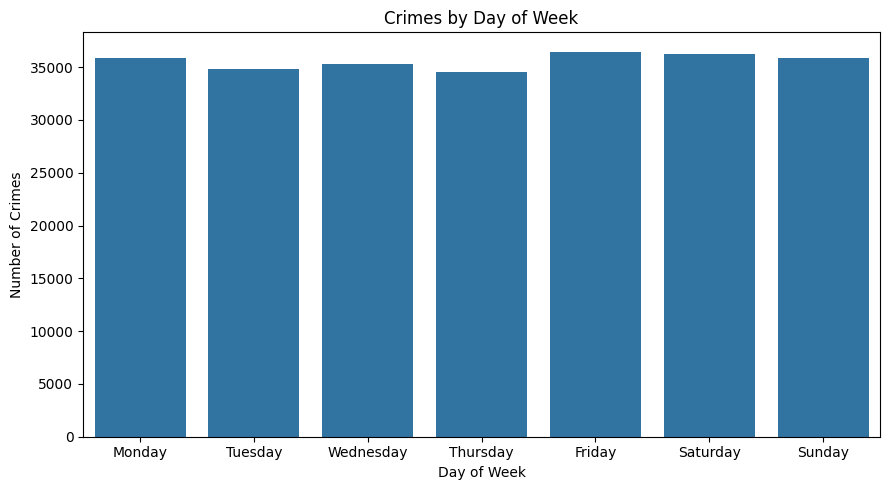

In [18]:
order_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
day_counts = df["DayOfWeek"].value_counts().reindex(order_days)
plt.figure(figsize=(9,5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title("Crimes by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()

<h3>Insight 12: Crime tends to rise on weekends, especially Saturday.</h3>
<h3>Insight 13: This makes sense because weekends bring more parties, nightlife, and people on the streets.</h3>
<h3>Insight 14: During weekdays, crime is lower but still steady but it never disappears.</h3>

<h3>Visualization 5. Crimes by Hour of Day</h3>

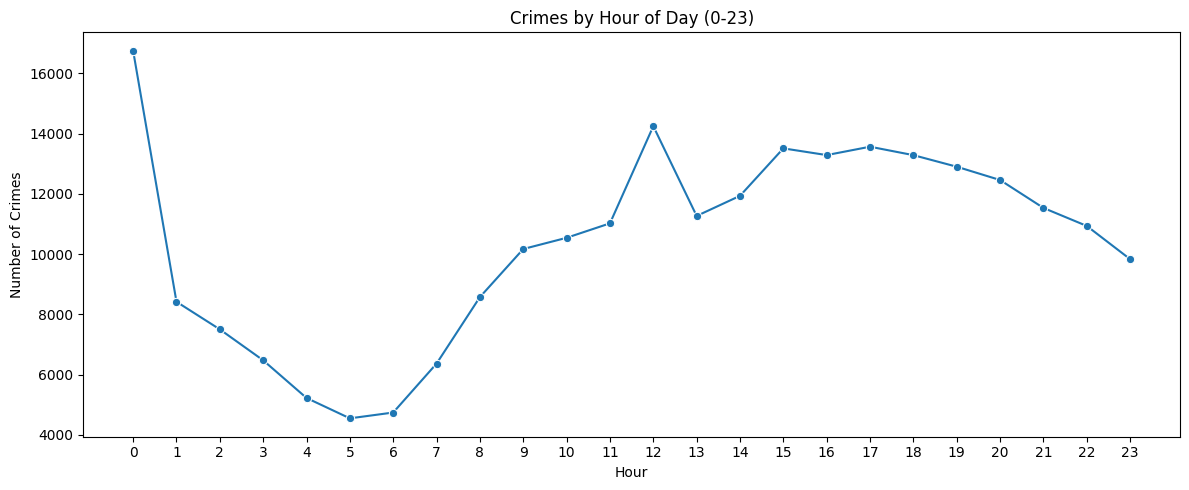

In [21]:
hourly_counts = df["Hour"].value_counts().sort_index()
plt.figure(figsize=(12,5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o")
plt.title("Crimes by Hour of Day (0-23)")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

<h3>Insight 15: Evening hours, especially around 6 PM to midnight, are the most dangerous</h3>
<h3>Insight 16: Early morning hours like 3–6 AM are the quietest, showing most people are at home.
</h3>
<h3>Insight 17: Crime follows the daily routine of the city, busier hours mean more incidents.</h3>

<h3>Visualization 6. Top 10 Community Areas with Most Crimes</h3>

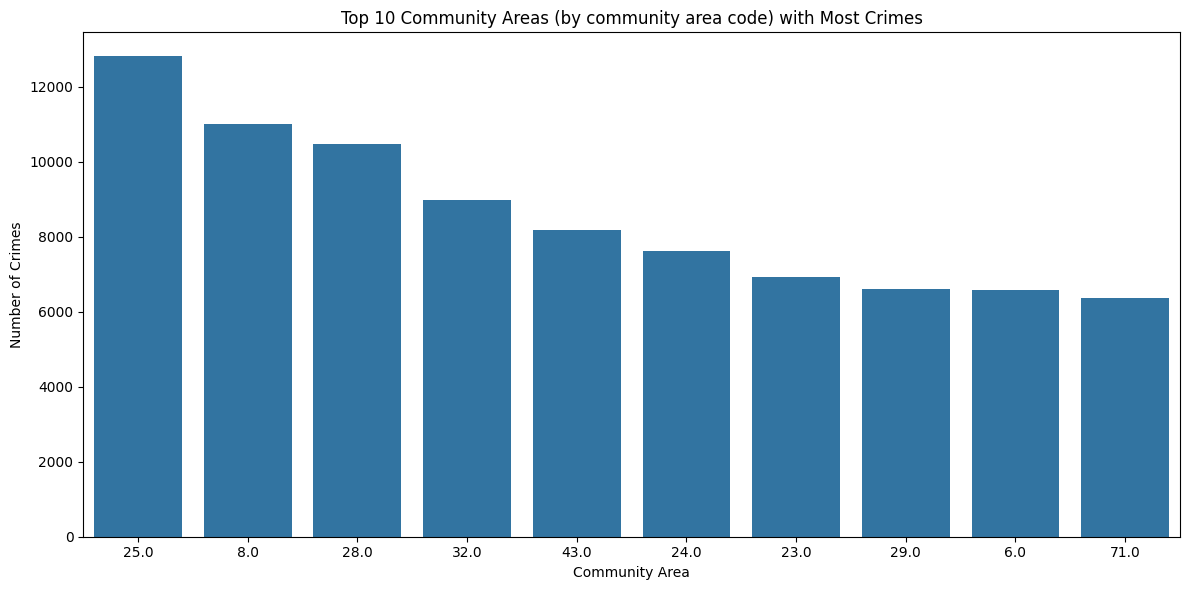

In [23]:
top_areas = df["Community Area"].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_areas.index.astype(str), y=top_areas.values)
plt.title("Top 10 Community Areas (by community area code) with Most Crimes")
plt.xlabel("Community Area")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()


<h3>Insight 15: A small number of community areas carry the heaviest crime burden.</h3>
<h3>Insight 16: These areas may need extra police presence or community support programs.
</h3>
<h3>Insight 17: If these hotspots improve, the city’s overall crime rate would drop a lot.</h3>

<h3>Visualization 7. Top 10 Primary Crime Types</h3>

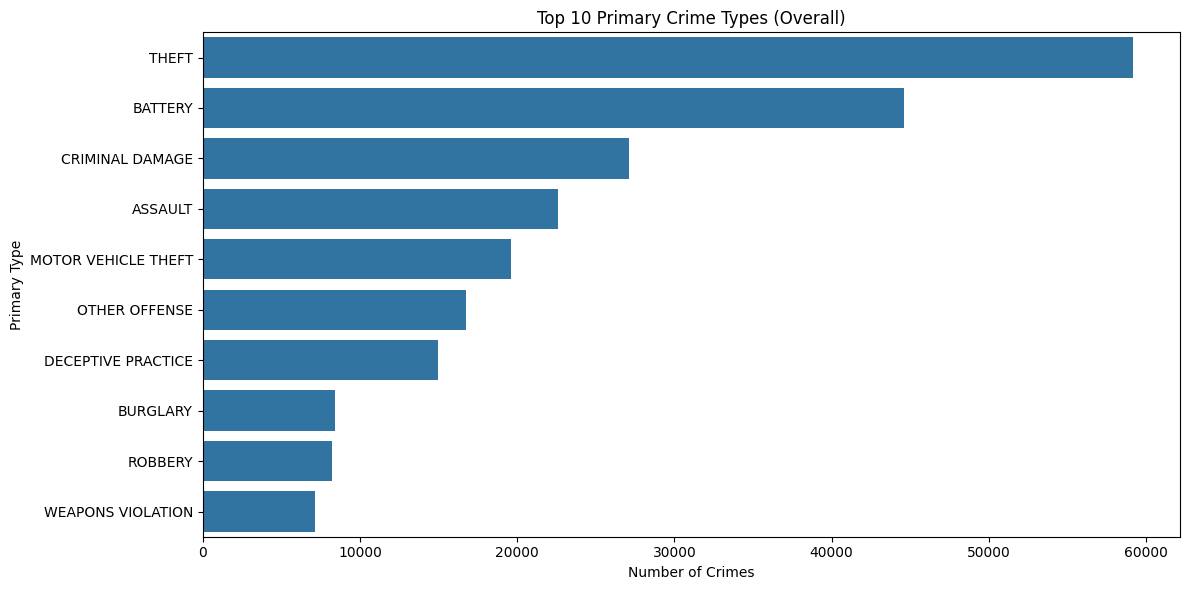

In [25]:
top_types = df["Primary Type"].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_types.values, y=top_types.index)
plt.title("Top 10 Primary Crime Types (Overall)")
plt.xlabel("Number of Crimes")
plt.ylabel("Primary Type")
plt.tight_layout()
plt.show()


<h3>Insight 18: Theft and battery dominate Chicago’s crime scene.</h3>
<h3>Insight 19: Since these two make up such a large share, fighting them should be the top priority.
</h3>
<h3>Insight 20: Less common crimes still matter, but they don’t impact totals as much as these top ones.</h3>

<h3>Visualization 8. Arrest Rate by Primary Type</h3>

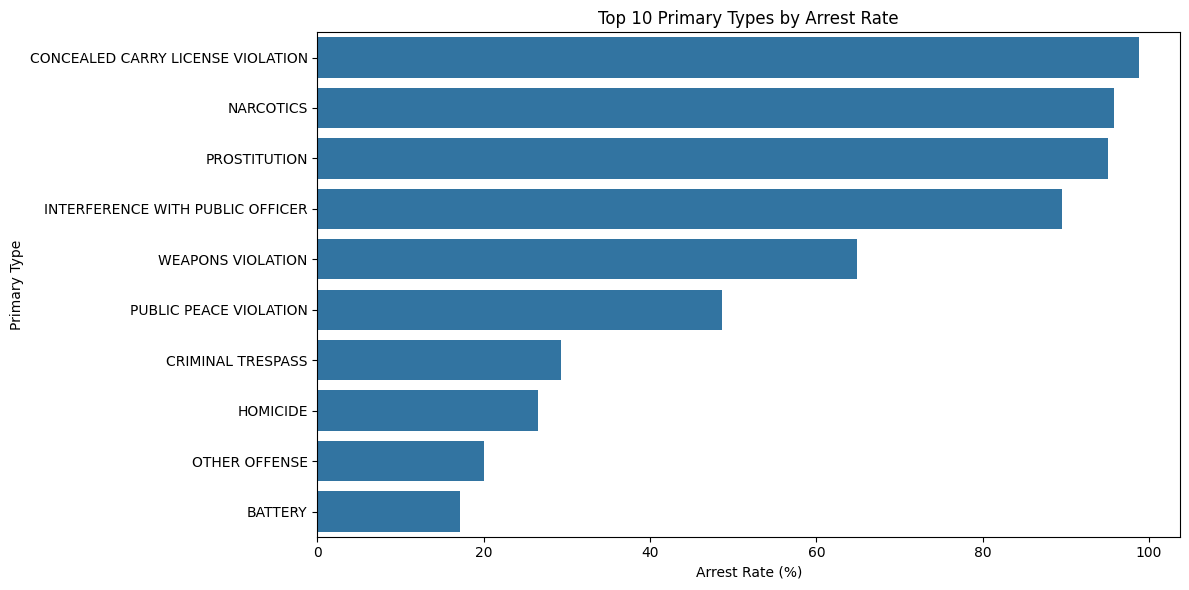

In [29]:
type_counts = df["Primary Type"].value_counts()

sufficient_types = type_counts[type_counts >= 200].index
arrest_rate = df[df["Primary Type"].isin(sufficient_types)].groupby("Primary Type")["Arrest"].mean().sort_values(ascending=False)
top_arrest_rate = arrest_rate.head(10) * 100

plt.figure(figsize=(12,6))
sns.barplot(x=top_arrest_rate.values, y=top_arrest_rate.index)
plt.title("Top 10 Primary Types by Arrest Rate")
plt.xlabel("Arrest Rate (%)")
plt.ylabel("Primary Type")
plt.tight_layout()
plt.show()

<h3>Insight 21: Concealed Carry License Violations have the highest arrest rate, almost 100%. This means if someone breaks this law, they almost always get caught.</h3>
<h3>Insight 22: Narcotics cases also show very high arrest rates, proving police are strongly focused on drug-related crimes.</h3>
<h3>Insight 23: Prostitution arrests are also high, showing that this crime is often targeted by police operations.</h3>
<h3>Insight 24: Crimes like Interference with a Public Officer and Weapons Violations also result in arrests most of the time, which makes sense since police are directly involved.</h3>
<h3>Insight 25: Public Peace Violations fall around the middle, people are arrested in many cases, but not always.</h3>
<h3>Insight 26: Other Offenses and Battery have the lowest arrest rates here, meaning many offenders go unpunished.</h3>

<h3>Visualization 9. Top 10 Location Descriptions</h3>

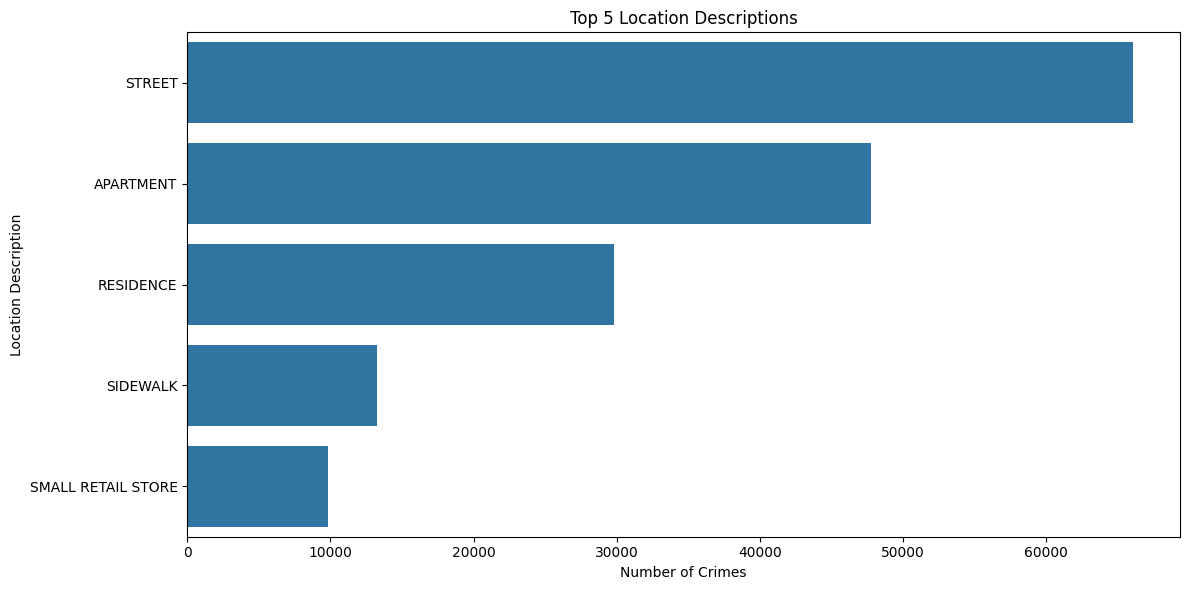

In [33]:
top_locations = df["Location Description"].value_counts().nlargest(5)
plt.figure(figsize=(12,6))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top 5 Location Descriptions")
plt.xlabel("Number of Crimes")
plt.ylabel("Location Description")
plt.tight_layout()
plt.show()

<h3>Insight 27: Streets have the highest number of crimes by far, showing that public spaces are the most unsafe.</h3>
<h3>Insight 28: Apartments come second, which suggests that private living spaces also face a lot of incidents, not just public areas.</h3>
<h3>Insight 29: Residences are also a major crime location, proving that crimes often reach people’s homes.</h3>
<h3>Insight 30: Sidewalks having many cases means crime often happens right where people walk daily, an everyday risk.</h3>
<h3>Insight 31: Small retail stores being in the top 5 shows businesses are frequent targets, likely because of theft or robbery.</h3>
<h3>Insight 32: Overall, the data suggests that both public spaces (streets, sidewalks) and private spaces (apartments, homes) are heavily affected, meaning crime impacts every part of daily life.</h3>

In [37]:
# Prepare lat-lon coordinates for heatmap (dropna, sample to limit size)
coords = df[["Latitude", "Longitude"]].dropna()

# If dataset is very large, sample to 50k (no loop, just pandas sample)
coords_sample = coords.sample(n=min(len(coords), 50000), random_state=42).values.tolist()

# Build folium map with heat map
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(coords_sample, radius=8, blur=15, min_opacity=0.3).add_to(chicago_map)
# Show map (in notebook this will render)
chicago_map

<h3>Insight 33: The brightest area in downtown Chicago shows this is the main hotspot for crimes, likely because it’s the busiest part of the city.</h3>
<h3>Insight 34: The farther from downtown you go, the lighter the heatmap gets, meaning fewer crimes happen in suburban areas.</h3>
<h3>Insight 35: The heatmap proves that crime is not spread evenly, it is concentrated in certain neighborhoods, especially the city center.</h3>